## Linear Regression and RANSAC

In [1]:
# Load the modules we need
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets

In [2]:
#  Create some intial data
n_samples = 1000

X, y = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      random_state=0)

In [3]:
# Add some outlier data
np.random.seed(0)
n_outliers = 50
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

In [4]:
# Create some test positions for for the lines we will draw
line_X = np.arange(X.min(), X.max())[:, np.newaxis]

In [17]:
from numpy.linalg import inv
def linearRegression(XValues, YValues):
    lineValues = np.zeros((2, 1))
    matrixA = np.zeros((2, 2))
    matrixB = np.zeros((2, 1))
    sumX = 0
    sumXSquare = 0
    sumY = 0
    sumXY = 0

    for i in range (0, XValues.size):
        sumX += XValues[i]
        sumXSquare += XValues[i] ** 2
        sumY += YValues[i]
        sumXY += XValues[i] * YValues[i]

    matrixA = [[int(sumXSquare), int(sumX)], [int(sumX), X.size]]
    matrixB = [[int(sumXY)], [int(sumY)]]
    matrixA = inv(matrixA)

    lineValues = np.dot(matrixA, matrixB)
    return lineValues

In [18]:
# This is the cell you need to replace to complete Task 2.
# Fit line using all data.

lineValues = linearRegression(X, y)
line_y = np.zeros(line_X.size)
for i in range (0, line_X.size):
    line_y[i] = lineValues[0] * line_X[i] + lineValues[1]
print(line_y)

[-174.43697648 -120.23494336  -66.03291024  -11.83087713   42.37115599
   96.57318911  150.77522222  204.97725534]


In [11]:
def RANSAC(iterationN, distance, inputPoint):
    # line values go gradient, y-intercept
    lineValues = np.zeros((iterationN, 2, 1))
    numOfInliers = np.zeros(iterationN)
    for i in range (0, iterationN):
        # pick 2 random points
        randomIndex = random.randrange(0, X.size)
        pointOne = [X[randomIndex], y[randomIndex]]
        randomIndex = random.randrange(0, X.size)
        pointTwo = [X[randomIndex], y[randomIndex]]
        # compute m & c values
        gradient = (pointTwo[1] - pointOne[1]) / (pointTwo[0] - pointOne[0])
        yIntercept = pointOne[1] - (gradient * pointOne[0])
        lineValues[i] = [gradient, yIntercept]
        # classify points as inliers or outliers
        for j in range (0, X.size):
            point = [X[j], y[j]]
            distanceToModel = (abs((gradient*point[0]) - point[1] + yIntercept) / (math.sqrt(gradient**2 + 1)))
            if distanceToModel <= distance:
                # if less than distance then it is an inlier
                numOfInliers[i] += 1
    
    # select m & c values with most inliers / fewest outliers outliers
    bestModelIndex = int(list(numOfInliers).index(np.amax(numOfInliers)))
    if inputPoint is not None:
        # calculating if input point is inlier or outlier
        distanceToModel = (abs((lineValues[bestModelIndex][0]*inputPoint[0]) - inputPoint[1] + lineValues[bestModelIndex][1]) / (math.sqrt(lineValues[bestModelIndex][0]**2 + 1)))
        if distanceToModel <= distance:
            print("Input point is an inlier")
        else:
            print("Input point is an outlier")
    return lineValues[bestModelIndex]

In [15]:
# This is the cell you need to replace to complete Task 3.
# Robustly fit linear model with RANSAC algorithm
import random
import math
#lineValues = np.zeros((2, 1))

# since S = 2, p = 0.99, proportion of outliers is 50/1000 thus 2 iterations required
iterationN = 5
distance = 0.5

lineValues = RANSAC(iterationN, distance, None)

line_y_ransac = np.zeros(line_X.size)
for i in range (0, line_X.size):
    line_y_ransac[i] = lineValues[0] * line_X[i] + lineValues[1]
print(line_y_ransac)

[-258.39081599 -174.27795079  -90.1650856    -6.05222041   78.06064479
  162.17350998  246.28637517  330.39924037]


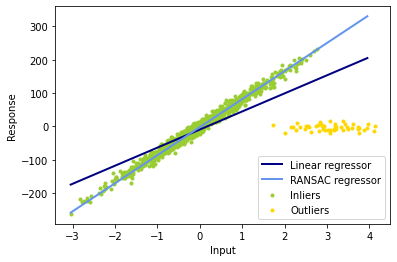

In [16]:
lw = 2

doing_linear = True
doing_ransac = True

if (doing_linear):
    plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')

if (doing_ransac):
    plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.', label='Inliers')
    plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.', label='Outliers')
    plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw, label='RANSAC regressor')
else:
    plt.scatter(X, y, color='yellowgreen', marker='.', label='Data')
    
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()